In [1]:
import pandas as pd
import emoji as em
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [2]:
pd.set_option('display.max_rows',None)

In [3]:
data_g = pd.read_excel("part6_v2.xlsx")

In [4]:
import regex

def supprimer_emojis(texte):
    pattern = regex.compile("[\p{Emoji}]")
    texte_sans_emojis = pattern.sub("", texte)
    return texte_sans_emojis

data_g['Comment'] = [supprimer_emojis(commentaire) for commentaire in data_g['Comment']]

In [5]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('arabic'))

In [6]:
from nltk.tokenize import word_tokenize
i = 0
for comment in data_g['Comment']:
    tokens = word_tokenize(comment)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    data_g['Comment'].iloc[i] = ' '.join(tokens)
    i=i+1

C:\Users\abhad\AppData\Local\Temp\ipykernel_8292\1892020558.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_g['Comment'].iloc[i] = ' '.join(tokens)


In [7]:
vectorizer = CountVectorizer(min_df=0, lowercase=False)

In [8]:
X = vectorizer.fit_transform(data_g['Comment'])

In [9]:
Y = data_g['Degout']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2 , random_state = 42)

In [11]:
model = RandomForestClassifier()

In [12]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [13]:
y_pred = model.predict(x_test)

In [14]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       241
           1       0.66      0.51      0.58       219

    accuracy                           0.64       460
   macro avg       0.65      0.64      0.63       460
weighted avg       0.65      0.64      0.64       460



In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.6434782608695652


[[184  57]
 [107 112]]


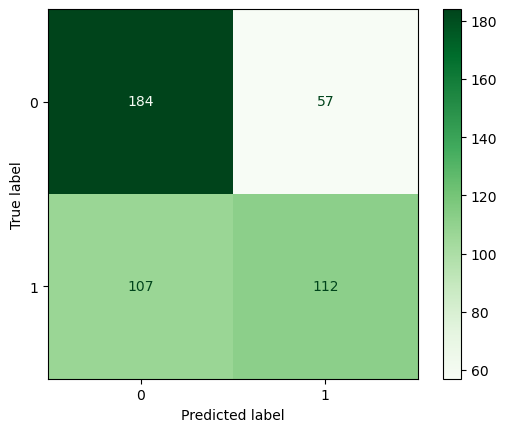

In [16]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Greens", values_format='')